## 1. Introduction
A notebook for NLP on the Wikipedia Movie Plots dataset. We illustrate the following:

- Exploratory data analysis (EDA) with summary statistics and wordclouds
- NLP: tokenization, lemmatization, parts-of-speech (PoS) tagging, Dependency Parsing, Named Entity Recognition (NER), Sentence Boundary Detection (SBD) using spacy
- Vectorization with Bag of Words (BoW), TF-IDF and spaCy using scikit-learn
- Topic modelling: Extract major themes (topics) from plots using Latent Dirichlet Allocation (LDA) using gensim
- Visualization of topic clusters with pyLDAvis

In [40]:
# Core
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ML & NLP
import spacy
from spacy import displacy
from sklearn.decomposition import LatentDirichletAllocation,
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
import pyLDAvis.gensim

In [ ]:
# Download spaCy library
!python -m spacy download en_core_web_sm

## 2. EDA

### 2.1 Load movie plots dataset 

In [5]:
# Loading data
df_plots = pd.read_csv('./wiki_movie_plots.csv')
df_plots.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


### 2.2 Summary stats

In [6]:
df_plots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


<AxesSubplot:title={'center':'Top genres'}, xlabel='Genre'>

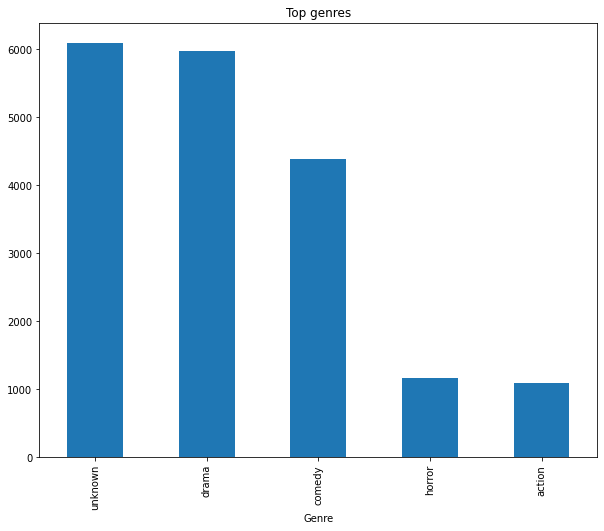

In [7]:
# Show popular genres
top_genres = df_plots.Genre.value_counts()[:5]
top_genres.plot(kind='bar', figsize=(10, 8), xlabel='Genre', title='Top genres')

### 2.3 Wordcloud

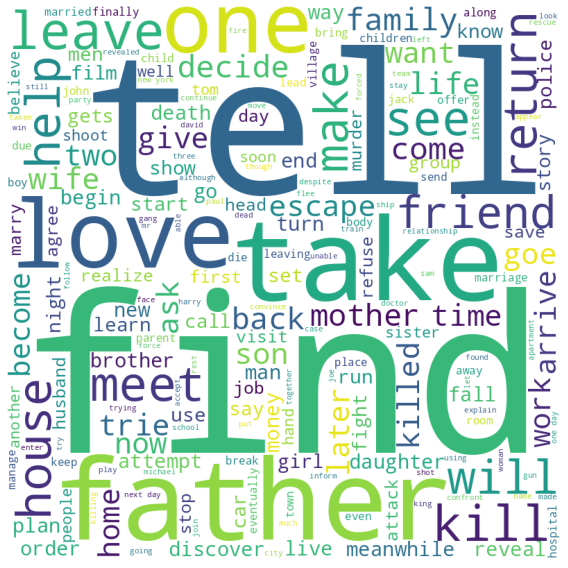

In [8]:
# Generate wordcloud from plots
from wordcloud import WordCloud, STOPWORDS
 
plot_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_plots.Plot:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    plot_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(plot_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
 
plt.show()

## 3. Features

In [9]:
# Create a spaCy object
nlp = spacy.load('en_core_web_lg')

In [10]:
# Get sample movie plot
sample_plot = df_plots['Plot'][10000]
sample_plot

"After a series of murders in Los Angeles's gay community, heterosexual police officer Sgt. Benson is assigned to go undercover as half of a gay couple with Officer Kerwin, a Records Clerk. Kerwin naively believes that he is closeted, although the entire Department knows about his sexual identity. The pair discover an earlier murder and learn that both victims appeared in the same gay magazine. Each had received a call from a hoarse-voiced man asking them to model for him, only to turn up dead soon after. Benson models for the magazine and is approached by the same hoarse-voiced man; but, when another model turns up dead, the man is cleared as a suspect.\r\nBenson grows close to Jill, the photographer of his shoot, and plans a weekend getaway with her. Kerwin suspects her of the murders, but his superiors put it down to jealousy. Kerwin uncovers evidence implicating Jill; but, when the police move to apprehend her, they discover her corpse. Her death unknown to Benson, he arrives for h

In [11]:
# Create doc from sample
doc = nlp(sample_plot)

### 3.1 Tokenization <a id="21"></a> <br>

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords.

In [13]:
for token in doc[:10]:
    print(token.text)

After
a
series
of
murders
in
Los
Angeles
's
gay


### 3.2 Part-Of-Speech (POS) Tagging <a id="22"></a> <br>

In corpus linguistics, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech,[1] based on both its definition and its context.

In [14]:
for token in doc[:10]:
    print(token, token.tag_, token.pos_, spacy.explain(token.tag_))

After IN ADP conjunction, subordinating or preposition
a DT DET determiner
series NN NOUN noun, singular or mass
of IN ADP conjunction, subordinating or preposition
murders NNS NOUN noun, plural
in IN ADP conjunction, subordinating or preposition
Los NNP PROPN noun, proper singular
Angeles NNP PROPN noun, proper singular
's POS PART possessive ending
gay JJ ADJ adjective (English), other noun-modifier (Chinese)


### 3.3 Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. 

In [15]:
for token in doc[:10]:
    print(token.text, "-->", token.lemma_)

After --> after
a --> a
series --> series
of --> of
murders --> murder
in --> in
Los --> Los
Angeles --> Angeles
's --> 's
gay --> gay


### 3.4 Sentence Boundary Detection (SBD)

Sentence Boundary Detection is the process of locating the start and end of sentences in a given text. This allows us to split a large corpus into mutiple sentences.


In [16]:
sentences = list(doc.sents)
len(sentences)

13

In [17]:
for sentence in sentences:
     print (sentence)

After a series of murders in Los Angeles's gay community, heterosexual police officer Sgt.
Benson is assigned to go undercover as half of a gay couple with Officer Kerwin, a Records Clerk.
Kerwin naively believes that he is closeted, although the entire Department knows about his sexual identity.
The pair discover an earlier murder and learn that both victims appeared in the same gay magazine.
Each had received a call from a hoarse-voiced man asking them to model for him, only to turn up dead soon after.
Benson models for the magazine and is approached by the same hoarse-voiced man; but, when another model turns up dead, the man is cleared as a suspect.

Benson grows close to Jill, the photographer of his shoot, and plans a weekend getaway with her.
Kerwin suspects her of the murders, but his superiors put it down to jealousy.
Kerwin uncovers evidence implicating Jill; but, when the police move to apprehend her, they discover her corpse.
Her death unknown to Benson, he arrives for his 

### 3.5 Dependency Parsing

Dependency Parsing is the process to analyze the grammatical structure in a sentence and find out related words as well as the type of the relationship between them.

for token in sentences[-1]:
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.dep_)

In [18]:
displacy.render(sentences[-1], style="dep" , jupyter=True, options={'distance': 75})

### 3.6 Named Entity Recognition
 Named Entity Recognition is an information extraction task where named entities in unstructured sentences are located and classified  in some pre-defined categories such as the person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

entities=[(i, i.label_, i.label) for i in doc.ents]
entities

In [45]:
spacy.displacy.render(doc, style='ent',jupyter=True)

Create custom tokenizer

tqdm.pandas()
plots_tokenized = df_plots.Plot[-100:].progress_apply(tokenize)
plots_tokenized

### 3.7 Bag of Words (BoW)

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. 
N-grams are combinations of adjacent words in a given text, where n is the number of words that incuded in the tokens. 

In [19]:
# Create custom tokenizer from spacy doc by lemmatizing, converting to lowercase, and removing whitespace. 
# Stopwords, punctuation & numbers are excluded
def spacy_tokenizer(text):
    text_list = [word.lemma_.lower().strip() for word in nlp(text) if word.text != '\n' and not word.is_stop 
            and not word.is_punct and not word.like_num]
    return ' '.join(text_list)

In [ ]:
# Tokenize sample dataset for vectorization
doc = df_plots.Plot[-10:].apply(spacy_tokenizer)
doc

In [31]:
# Get BoW
bow_vector = CountVectorizer(ngram_range=(1, 1))
bow_vector.fit_transform(doc)

<1000x14826 sparse matrix of type '<class 'numpy.int64'>'
	with 94754 stored elements in Compressed Sparse Row format>

### 3.8 TF-IDF

In information retrieval, tf–idf (also TFIDF, TFIDF, TF–IDF, or Tf–idf), short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

In [32]:
# Get Tf-IDF vector
tfidf_vector = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vector.fit_transform(doc)

<1000x14826 sparse matrix of type '<class 'numpy.float64'>'
	with 94754 stored elements in Compressed Sparse Row format>

## 4. Topic-modelling

In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body.

In [41]:
doc = df_plots.Plot[-1000:].apply(spacy_tokenizer)

In [47]:
corpus = [plot.split() for plot in doc]

# Creating a vectorizer
vectorizer = CountVectorizer(min_df=0.03, max_df=0.3, ngram_range=(1, 1))
plots_vector = vectorizer.fit_transform(doc)

In [48]:
# Create bag-of-words (BoW) vector from corpus
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

### 4.1 Latent Dirichlet Allocation Model

In [37]:
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=100, learning_method='online',verbose=False)
data_lda = lda.fit_transform(plots_vector)

In [52]:
# Build LDA model
n_topics = 5    # no. of topics to extract
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = n_topics, id2word = dic, passes = 10, workers = 2)
lda_model.show_topics()

[(0,
  '0.005*"find" + 0.005*"leave" + 0.005*"kill" + 0.004*"man" + 0.004*"take" + 0.004*"mother" + 0.003*"come" + 0.003*"time" + 0.003*"return" + 0.003*"young"'),
 (1,
  '0.004*"tell" + 0.004*"find" + 0.004*"leave" + 0.004*"friend" + 0.003*"kill" + 0.003*"year" + 0.003*"meet" + 0.003*"return" + 0.003*"day" + 0.003*"take"'),
 (2,
  '0.008*"young" + 0.006*"hee" + 0.005*"mi" + 0.005*"find" + 0.005*"school" + 0.005*"friend" + 0.004*"family" + 0.004*"leave" + 0.003*"day" + 0.003*"rei"'),
 (3,
  '0.007*"find" + 0.006*"soo" + 0.005*"kill" + 0.005*"man" + 0.004*"tae" + 0.004*"take" + 0.004*"day" + 0.004*"film" + 0.004*"friend" + 0.004*"go"'),
 (4,
  '0.006*"life" + 0.006*"soo" + 0.006*"young" + 0.005*"jin" + 0.005*"man" + 0.005*"year" + 0.005*"father" + 0.004*"min" + 0.004*"find" + 0.004*"yeon"')]

In [51]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.077240  0.013020       1        1  32.622685
0      0.059270  0.004791       2        1  24.910764
2     -0.052078 -0.086341       3        1  24.013843
3     -0.084432  0.068530       4        1  18.452708, topic_info=         Term        Freq       Total Category  logprob  loglift
1631       ji  278.000000  278.000000  Default  30.0000  30.0000
11536      mi  261.000000  261.000000  Default  29.0000  29.0000
11379     hee  389.000000  389.000000  Default  28.0000  28.0000
11453    yeon  248.000000  248.000000  Default  27.0000  27.0000
2089      rei  110.000000  110.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
89        day   69.789440  471.634815   Topic4  -5.9515  -0.2208
101    father   67.631155  425.769520   Topic4  -5.9829  -0.1499
47       home   62.604780  306.820721   Topic4  -6.0601   0.1005
125       old   61.678888  322.352874   Topic4  -6.0750   0.0363
120      meet   59.283030  349.697725   Topic4  -6.1147  -0.0848

[336 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
5841       2  0.979522       adam
14995      1  0.923229       adem
11202      1  0.065646         ae
11202      2  0.919042         ae
11202      3  0.032823         ae
...      ...       ...        ...
389        3  0.150444      young
389        4  0.089039      young
3561       1  0.046604       zack
3561       2  0.932074       zack
10607      3  0.941153  zinchenko

[594 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


## How to interpret this graph?
1. Topics on the left while their respective keywords are on the right.
2. Larger topics are more frequent and closer the topics, mor the similarity
3. Selection of keywords is based on their frequency and discriminancy.

**Hover over the topics on the left to get information about their keywords on the right.**